# Пример исследования данных

Эта тетрадка - пример завершенного исследования датасета iris. Будет рассмотрено три задачи машинного обучения - регрессия (обучение с учителем), классификация (обучение с учителем), кластеризация (обучение без учителя).

Это не призыв всё делать так же. Это пример как можно сделать некоторый результат - причем сразу в трех вариантах. Впрочем, достаточно уже вступлений, давайте начнем.

In [1]:
# импортируем библиотеки для работы с данными
import numpy as np # это библиотека для работы с массивами чисел
import pandas as pd # это библиотека для работы с датасетами
import seaborn as sns # это библиотека для визуализаций

# следующая магическая команда позволяет отображать диаграммы в тетрадке
%matplotlib inline

Мы возьмем уже готовый датасет iris из библиотеки sklearn, сначала сохраним его как csv-файл, а затем обратно считаем - в учебных целях.

In [2]:
# это подготовительная клетка. 

from sklearn.datasets import load_iris

# получим данные
data = load_iris()

# посмотрим что в словаре данных есть
data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [3]:
print(data.DESCR) # распечатаем описание датасета

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

Наши данные представляют собой 150 записей о цветках ириса, которые представлены 4 признаками - sepal width/length, petal width/lengh (ширина и длина цветка и листов). Каждому цветку соответствует один из трех сортов: Setosa, Versicolour, Virginica.

In [4]:
# загрузим наши данные в датафрейм и тем самым создадим датасет
dataframe = pd.DataFrame({
    'sepal length': data.data[:, 0], # data.data - это numpy-массив признаков. 
    'sepal width': data.data[:, 1], # обозначением :, 1 - мы индексируем все строки и только ВТОРУЮ колонку
    'petal length': data.data[:, 2], 
    'petal width': data.data[:, 3],
    'target': data.target, # target содержит только порядковый номер сорта 
    'sorts': [data.target_names[sort] for sort in data.target] # поэтому мы обходим массив номеров
    # и получаем строки названий
})

In [5]:
# сохраним данные в csv
dataframe.to_csv('iris.csv', index=False)
# сохраним вместе с названиями столбцов
# и без порядкового номера

In [6]:
# перечитаем обратно, задав для примера некоторые параметры
# разделитель - запятая, десятичная точка - точка, кодировка utf-8, в первой строке - заголовки
dataframe = pd.read_csv('iris.csv', sep=',', decimal='.', encoding='utf-8')

In [7]:
# посмотрим на наши данные таблично
dataframe

,sepal length,sepal width,petal length,petal width,target,sorts
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


## Разведочный анализ данных

In [8]:
# посмотрим информацию о данных
dataframe.describe()

,sepal length,sepal width,petal length,petal width,target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


Видим максимальные и минимальные значения для признаков, их среднее тоже видим, и меру разброса - стандартное отклонение. Надо сделать визуализацию, чтобы понять с чем мы имеем дело.

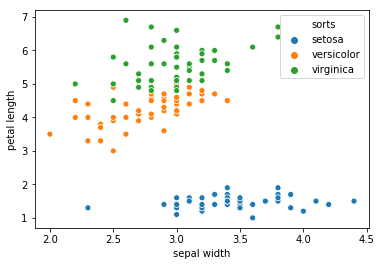

In [9]:
# построим точечную диаграмму, задав оси и цвет
sns.scatterplot(x='sepal width', y='petal length', hue='sorts', data=dataframe);

Уже сейчас видно, что на выбранных осях сорта "кучкуются" по группам. Посмотрим как выглядит эта картина по всем сочетаниям осей.

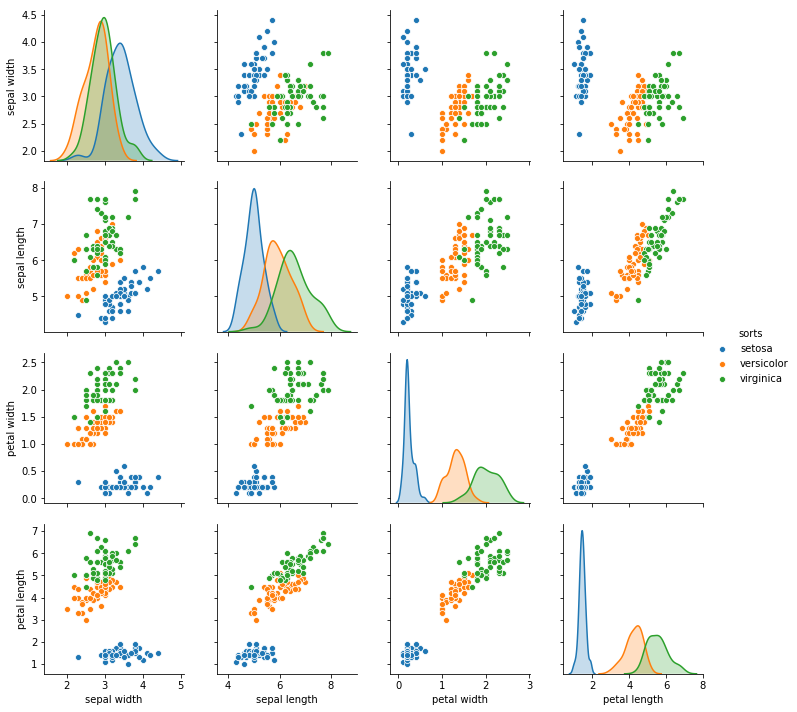

In [10]:
features = [
    'sepal width', 'sepal length',
    'petal width', 'petal length'
]

sns.pairplot(
    data=dataframe[features + ['sorts']], # возьмем только признаки и название сорта
    hue='sorts', # по какой колонке подсвечиваем
); # точка с запятой нужна, чтобы не выводить результат запуска команды

На диагонали у нас стоят гистограммы распределения каждого признака: то есть как часто встречаются те значения, которые отложены по оси Х. Вне диагонали - точечные диаграммы того, как располагаются характеристики конкретных наших 150 цветков ириса по выбранным осям.

Видно, что имеет место некоторое "кучкование" для всех сочетаний признаков, но классы versicolor и virginica ближе друг к другу и слегка так перемешаны.

У нас достаточно хорошие данные, уже почищенные. Если бы в них были пропущенные значения, такие строки можно было бы например удалить.

## Задача регрессии

Попробуем смоделировать зависимость petal width от всех остальных параметров.

In [11]:
# импортируем линейную модель
from sklearn.linear_model import LinearRegression

# импортируем градиентный бустинг над деревьями решений
from sklearn.ensemble import GradientBoostingRegressor

# импортируем методы работы с разбиениями и метриками
from sklearn.model_selection import train_test_split

In [12]:
regression_features = ['petal length', 'sepal length', 'sepal width']

# разобьем наше множество цветков на тренировочное и отложенный тест (25%)
train_X, test_X, train_y, test_y = train_test_split(
    dataframe[regression_features], # у нас будет три признака
    dataframe['petal width'], # один отклик
    test_size=0.25, # и одно разбиение на два множества - по 75% и 25% от всех 150 цветков
    shuffle=True # обязательно перемешаем все записи о цветках
)

In [13]:
# обучим модели
linear_model = LinearRegression().fit(train_X, train_y)
boosting_model = GradientBoostingRegressor().fit(train_X, train_y)

In [14]:
# импортируем методы подсчета метрик регрессии
from sklearn.metrics import r2_score, mean_absolute_error

# и сделаем функцию вывода в тетрадку этих метрик
def print_metrics(regressor):
    print('На тестовом множестве')
    test_predictions = regressor.predict(test_X)
    print('Мера объяснения изменений в данных', r2_score(test_y, test_predictions))
    print('Средняя абсолютная ошибка (в см)', mean_absolute_error(test_y, test_predictions))

In [15]:
print_metrics(linear_model)

На тестовом множестве
Мера объяснения изменений в данных 0.9215652559873315
Средняя абсолютная ошибка (в см) 0.16239957380937223


In [16]:
print_metrics(boosting_model)

На тестовом множестве
Мера объяснения изменений в данных 0.9302297857369208
Средняя абсолютная ошибка (в см) 0.15332370261564685


Интересно, какие признаки были более важными c точки зрения градиентного бустинга.

In [17]:
for index, importance in enumerate(boosting_model.feature_importances_):
    print('важность', regression_features[index], '%.3f' % importance)

важность petal length 0.955
важность sepal length 0.016
важность sepal width 0.029


In [18]:
# с точки зрения линейной регрессии чем больше по модулю коэффициент - тем больше его влияние
for index, importance in enumerate(linear_model.coef_):
    print('коэффицент', regression_features[index], '%.3f' % importance)

коэффицент petal length 0.529
коэффицент sepal length -0.183
коэффицент sepal width 0.274


Сразу видно, какой признак дал наибольший вклад в предсказание целевой величины.

## Классификация

In [19]:
# снова сделаем разбиение, но уже с другими признаками и другим откликом (индексом сорта)
train_X, test_X, train_y, test_y = train_test_split(
    dataframe[features],
    dataframe['target'],
    test_size=0.25,
    shuffle=True
)

In [20]:
# импортируем модель логистической регрессии
from sklearn.linear_model import LogisticRegression

# импортируем классификатор на основе случайного леса
from sklearn.ensemble import RandomForestClassifier

In [21]:
# обучим их на тренировочном множестве
logreg_model = LogisticRegression(solver='liblinear', multi_class='auto').fit(train_X, train_y)
forest_model = RandomForestClassifier(n_estimators=15).fit(train_X, train_y)

In [22]:
# давайте посмотрим на матрицы несоответствий на тестовом множестве
from sklearn.metrics import confusion_matrix

def print_matrix(model):
    print('Матрица для тестового множества')
    predictions = model.predict(test_X)
    print(confusion_matrix(test_y, predictions))

In [23]:
print_matrix(logreg_model)

Матрица для тестового множества
[[10  0  0]
 [ 0 12  2]
 [ 0  0 14]]


In [24]:
print_matrix(forest_model)

Матрица для тестового множества
[[10  0  0]
 [ 0 11  3]
 [ 0  0 14]]


Как мы видим, случайный лес здесь ошибся на 1 раз больше, из всего 12 + 9 + 15 + 2 = 38 случаев.

## Кластеризация

Попробуем посмотреть, не зная ничего о сортах, разбиваются ли наши данные на разное количество групп.

In [25]:
# импортируем метрику качества кластеризации
from sklearn.metrics import silhouette_score

# чем больше величина silhouette - тем лучше точки принадлежат своим кластерам. то есть тем лучше

In [26]:
%%time

# магическая команда %%time в начале клетки позволяет узнать сколько времени она выполнялась

from sklearn.cluster import KMeans 

# переберем разное число кластеров и выберем лучший вариант по нашей метрике

best_score = -np.inf # инициализируем лучшую метрику минус бесконечностью
best_model = None

for clusters_number in range(2, 8): # от 2 до 7 включительно
    candidate_model = KMeans(clusters_number).fit(dataframe[features])
    score = silhouette_score(dataframe[features], candidate_model.labels_)
    if score > best_score:
        # запомним модель
        best_model = candidate_model
        best_score = score

CPU times: user 512 ms, sys: 124 ms, total: 636 ms
Wall time: 1.31 s


In [27]:
print('наилучшая метрика', best_score, 'для', best_model.n_clusters, 'кластеров')

наилучшая метрика 0.6810461692117464 для 2 кластеров


Как видим, KMeans по умолчанию нам дал два кластера. Посмотрим визуально.

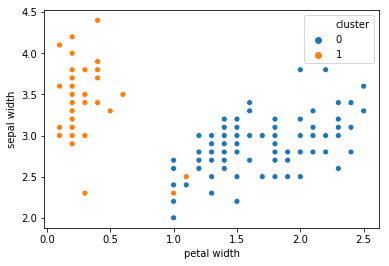

In [28]:
dataframe['cluster'] = best_model.predict(dataframe[features])

sns.scatterplot(
    x='petal width',
    y='sepal width',
    hue='cluster',
    data=dataframe
);

Вот как ни странно, таким неочевидным образом, KMeans разбил на кластеры. То есть система отнесения цветов ириса к трем сортам, не самая совершенная. Можно относить их только к двум, у двух сортов слишком похожие характеристики, и они слабо отличаются.

## Интерактивная презентация

Мы сделаем из этой тетрадки интерактивную веб-страничку с помощью сервиса `voila`. Делается веб-страница одной командой, однако чтобы добавить интерактивности у нас будет немного кода.

In [29]:
# импортируем библиотеку, отвечающую за отображение элементов управления интерфейса
import ipywidgets

In [30]:
# сделаем классификатор только от двух признаков
dataset = dataframe[['petal width', 'sepal length', 'target']]

# обучим на всем множестве классификатор для целей презентации
classifier = RandomForestClassifier(n_estimators=40).fit(dataset[
    ['petal width', 'sepal length']
], dataset['target'])

# выведем долю точных ответов
'точность', "%.2f" % classifier.score(dataframe[['petal width', 'sepal length']], dataset['target'])

('точность', '0.97')

In [31]:
import matplotlib.pyplot as plt

sorts_names = {
    0: 'setosa',
    1: 'versicolor',
    2: 'virginica'
}

def plot_chart(petal_width, sepal_length):
    """
        Эта функция, принимая на вход признаки цветка неизвестного сорта,
        относит его к определенному сорту благодаря классификации.
        В итоге она строит диаграмму с этой точкой.
    """
    sort = classifier.predict([[petal_width, sepal_length]])[0]
    plot_data = dataset.copy() # скопируем датасет, так как будем менять
    plot_data['sort'] = [sorts_names[number] for number in plot_data.target]
    plot_data = plot_data.append({
        'petal width': petal_width,
        'sepal length': sepal_length,
        'sort': sorts_names[sort]
    }, ignore_index=True)
    sns.scatterplot(x='petal width', y='sepal length', hue='sort', data=plot_data)
    plt.annotate(
        sorts_names[sort],
        [petal_width, sepal_length],
        [petal_width + 0.3, sepal_length + 0.3],
        arrowprops={'arrowstyle': '->'}
    ); # добавим точке надпись

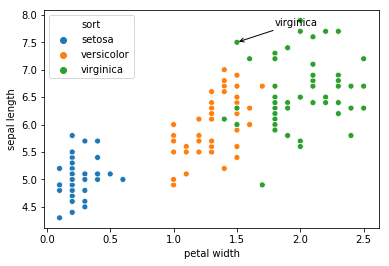

In [32]:
# сделаем интерактивной нашу диаграмму!
ipywidgets.interact(plot_chart, petal_width=1.5, sepal_length=7.5);

Запустите следующую команду из командной строки, она откроет новую страницу в браузере с этой тетрадкой без кода

```
python -m voila iris_complete.ipynb
```

Перейдите в конец странице, там вы увидите два слайдера, которыми вы сможете управлять координатами точки.